In [4]:
#inporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#reading csv
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Hyperparameters to adjust (RandomForestClassifier)**


*   max_depth
*   max_features
*   min_samples_leaf
*   min_samples_split
*   n_estimators







In [6]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

#creating evalute_preds function
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Random seed
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

## **clf_2**

In [7]:
np.random.seed(42)

#create a second classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make baseline predictions with different hyperparameter
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics


Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

# **Hyperparameter tuning using RandomizedSearchCV**

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 2, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Initiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions= grid,
                            n_iter = 10, #number of models to try
                            cv= 5,
                            verbose= 2)

#fit RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 2, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [9]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2}

In [10]:
#make predictions using the best hyperparameter
rs_y_preds = rs_clf.predict(X_test)

#evalute the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Acc: 85.25%
Precision: 0.77
Recall: 0.96
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.77, 'recall': 0.96, 'f1': 0.86}

# **Hyperparameter tuning GridSearchCV**

In [11]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 2, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [12]:
grid_2 = {'n_estimators': [200, 500, 1200],
          'max_depth': [2],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [13]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Initiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid= grid_2,
                      cv= 5,
                      verbose= 2)

#fit GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [2], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [200, 500, 1200]},
             verbose=2)

In [14]:
gs_clf.best_params_

{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [15]:
#make predictions using the best hyperparameter
gs_y_preds = gs_clf.predict(X_test)

#evalute the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 85.25%
Precision: 0.77
Recall: 0.96
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.77, 'recall': 0.96, 'f1': 0.86}



---

# ***GridSearchCV uses all the combination on the grid (so it may take huge time to execute if the grid is to big) while RandomizeSearchCV's combination number dipends on n_iter***

---



# **Compare Metrics**

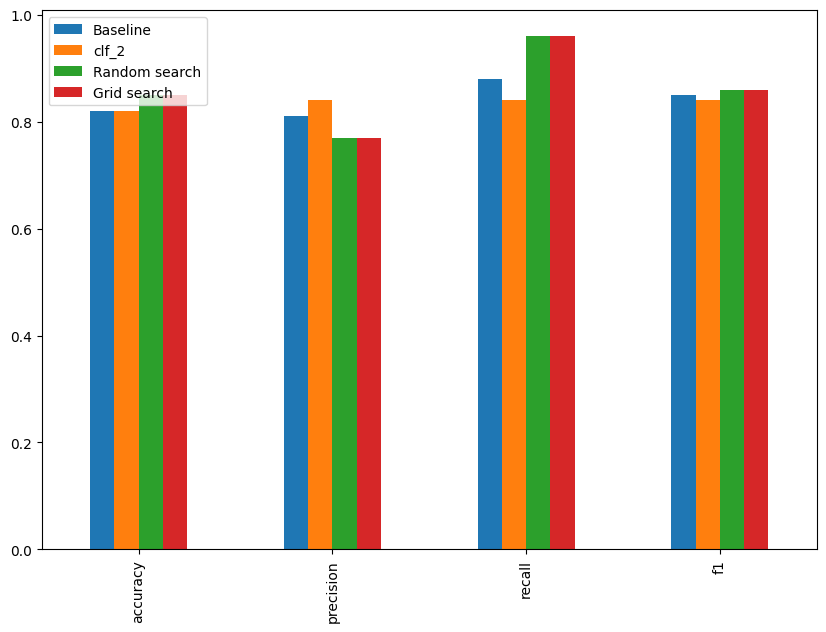

In [16]:
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "Random search": rs_metrics,
                                "Grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 7));

# **Save and Load Model**

## **using Pickle**

In [17]:
import pickle

#save an extisting model to file
pickle.dump(clf_2, open("random_forest_model_clf_2.pkl", "wb"))

In [18]:
#Load a save model
loaded_model = pickle.load(open("random_forest_model_clf_2.pkl", "rb"))
loaded_model

RandomForestClassifier()

In [19]:
np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#make predictions using the best hyperparameter
loaded_y_preds = loaded_model.predict(X_test)

#evalute the predictions
loaded_metrics = evaluate_preds(y_test, loaded_y_preds)
loaded_metrics

Acc: 93.44%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}

## **using Joblib**

In [21]:
from joblib import dump, load

#save model to file
dump(clf_2, filename="random_forest_model_clf_2.joblib")

['random_forest_model_clf_2.joblib']

In [23]:
#iport the model
loaded_job_model = load(filename="random_forest_model_clf_2.joblib")
loaded_job_model

RandomForestClassifier()

In [24]:
np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#make predictions using the best hyperparameter
loaded_y_preds = loaded_job_model.predict(X_test)

#evalute the predictions
loaded_job_metrics = evaluate_preds(y_test, loaded_y_preds)
loaded_job_metrics

Acc: 93.44%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}



---


# ***To save a large model joblib is better to use***


---

